## Introduction to the OpenAI gym-anytrading Library

In this small Notebook I will play around with the OpenAI gym framework using the anytrading enviroment where you can train an Agent to trade a certain stock. Since the framework for the Agent to train on is already build in the Library, our goal is it to write an algorithm which will learn from each trade.

In [1]:
import gym
import gym_anytrading

import yfinance
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Download the historical price data from yahoo finance using yfinance
ticker = yfinance.Ticker("AMC")

df = ticker.history(period="1y")

In [3]:
#looking at the first 5 rows
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-15,4.37,4.58,4.22,4.50,4830700,0,0
2020-07-16,4.33,4.48,4.31,4.38,1997500,0,0
2020-07-17,4.36,4.37,4.20,4.27,2101700,0,0
2020-07-20,4.21,4.23,4.07,4.15,2393100,0,0
2020-07-21,4.15,4.24,4.08,4.15,1925900,0,0


In [4]:
#Creating the enviroment
env = gym.make("stocks-v0", df=df, frame_bound=(10,100), window_size=5)

{'total_reward': -2.879999876022339, 'total_profit': 0.3604746683651383, 'position': 0}


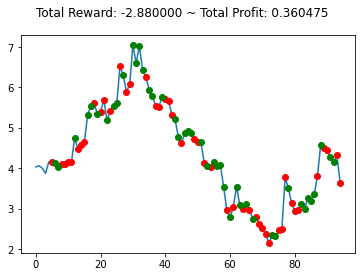

In [11]:
#reseting the state so we start t=0
state = env.reset()

#Performing one complete random trade on the data
while True:
    action = env.action_space.sample()
    new_state, reward, done, info = env.step(action)
    if done:
        print(info)
        env.render_all()
        break

In [14]:
#Performing 10 complete runs and printing the total reward and the total profit for each run

for i in range(10):
    state = env.reset()
    while True:
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        if done:
            print(info)
            break

{'total_reward': 1.929999828338623, 'total_profit': 1.2007875687585035, 'position': 0}
{'total_reward': 2.7900009155273438, 'total_profit': 1.3726616750678924, 'position': 1}
{'total_reward': 0.2999997138977051, 'total_profit': 0.6262112229933502, 'position': 1}
{'total_reward': -1.7599992752075195, 'total_profit': 0.43600917999933386, 'position': 0}
{'total_reward': -0.7599999904632568, 'total_profit': 0.5483789110664109, 'position': 1}
{'total_reward': -0.3600008487701416, 'total_profit': 0.7153110518858169, 'position': 0}
{'total_reward': 0.5200002193450928, 'total_profit': 0.6754915558382728, 'position': 0}
{'total_reward': 0.880000114440918, 'total_profit': 0.8902993001671238, 'position': 1}
{'total_reward': -1.9899992942810059, 'total_profit': 0.4818969163492233, 'position': 0}
{'total_reward': -0.39999961853027344, 'total_profit': 0.5235099272610642, 'position': 1}


In [ ]:
#Printing 10 random actions, states, rewards for visualizing the process in the framework
state = env.reset()

while True:
    action = env.action_space.sample()
    new_state, reward, done, info = env.step(action)
    print("action: ",action)
    print("state: ",new_state)
    print("reward: ",reward)
    input()
    if done:
        print(info)
        env.render_all()
        break

action:  1
state:  [[ 4.05999994  0.02999973]
 [ 4.         -0.05999994]
 [ 3.86999989 -0.13000011]
 [ 4.1500001   0.28000021]
 [ 4.15999985  0.00999975]]
reward:  0
input
action:  0
state:  [[ 4.         -0.05999994]
 [ 3.86999989 -0.13000011]
 [ 4.1500001   0.28000021]
 [ 4.15999985  0.00999975]
 [ 4.11999989 -0.03999996]]
reward:  -0.07999992370605469
input
action:  0
state:  [[ 3.86999989 -0.13000011]
 [ 4.1500001   0.28000021]
 [ 4.15999985  0.00999975]
 [ 4.11999989 -0.03999996]
 [ 4.03999996 -0.07999992]]
reward:  0
input
action:  1
state:  [[ 4.1500001   0.28000021]
 [ 4.15999985  0.00999975]
 [ 4.11999989 -0.03999996]
 [ 4.03999996 -0.07999992]
 [ 4.11000013  0.07000017]]
reward:  0
input
action:  1
state:  [[ 4.15999985  0.00999975]
 [ 4.11999989 -0.03999996]
 [ 4.03999996 -0.07999992]
 [ 4.11000013  0.07000017]
 [ 4.0999999  -0.01000023]]
reward:  0
input
action:  0
state:  [[ 4.11999989 -0.03999996]
 [ 4.03999996 -0.07999992]
 [ 4.11000013  0.07000017]
 [ 4.0999999  -0.0100